In [18]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
#from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import seaborn as sns

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [3]:
x1=np.random.normal(0, 1, 1000)
x2=x1+np.random.normal(0, 3, 1000)
x3=2*x1+x2
data = pd.DataFrame(
    { 'x1' : x1,
      'x2' : x2,
      'x3' : x3,
    }
    )
data

x1        x2         x3
0    1.383338  1.066577   3.833252
1    0.646833  2.967505   4.261170
2   -2.726529 -4.749198 -10.202255
3    1.191046  0.003963   2.386055
4    0.447789 -2.250582  -1.355004
5    0.186961 -3.974853  -3.600932
6   -0.111571 -2.676703  -2.899845
7    0.405382  3.002186   3.812949
8    0.739513  2.116780   3.595806
9   -1.199338 -2.195972  -4.594648
10  -0.698169 -0.217563  -1.613901
11   2.535464  3.704819   8.775748
12  -0.514766 -4.058735  -5.088267
13  -2.170362 -2.458602  -6.799326
14   0.430192  1.605745   2.466129
15  -1.098154  1.884934  -0.311374
16   0.224000  4.619053   5.067054
17   1.296861 -0.262728   2.330994
18   0.448780 -2.449572  -1.552012
19   0.231904 -4.842987  -4.379180
20   2.387743 -4.055762   0.719723
21   0.919854 -3.338098  -1.498391
22  -0.433680 -4.351789  -5.219149
23   0.176388  2.110406   2.463183
24  -0.712301 -3.462539  -4.887140
25   0.656582  0.165820   1.478984
26  -1.351591  5.251537   2.548356
27   0.437140 -0.092678   0.781603
28  -0.080549 -3.328468  -3.489565
29  -0.313089 -3.216752  -3.842930
..        ...       ...        ...
970  0.386030  2.444695   3.216756
971 -1.015796 -3.569826  -5.601417
972  1.366560  1.939435   4.672554
973 -1.114562 -3.908201  -6.137325
974 -0.001220  1.206875   1.204436
975  0.061324  3.341247   3.463896
976 -0.015291  2.802862   2.772280
977 -0.233918  3.166801   2.698964
978  0.713771  3.211799   4.639341
979  1.601405  0.587474   3.790285
980 -0.101637 -1.850375  -2.053650
981 -0.726075  0.845483  -0.606668
982 -0.435409  2.533457   1.662640
983 -0.474383  1.133723   0.184956
984 -1.037136  4.119246   2.044975
985 -0.584018 -0.877164  -2.045201
986  1.455676  4.875731   7.787083
987  0.558302  0.952981   2.069585
988 -0.419632  4.127971   3.288706
989  1.545254  4.349239   7.439747
990 -1.803067 -0.169053  -3.775187
991 -0.600834  1.285106   0.083439
992 -0.070761  5.237761   5.096239
993  2.229282  4.541171   8.999734
994 -0.863197  1.466001  -0.260393
995  0.731465  3.770462   5.233393
996  0.504764 -3.186255  -2.176727
997 -0.985988 -3.649123  -5.621098
998  0.800646  3.256523   4.857815
999 -0.052454 -0.149517  -0.254425

[1000 rows x 3 columns]

In [22]:
c=np.cov(data, rowvar=False)
print("Covariance matrix:")
print(c)
l, V = la.eig(c)
print("\nCovariance matrix again with eigenvalues-eigenvectors decomposition:")
print(np.dot(V,np.dot(np.diag(l), la.inv(V))))
print("\nEigenvectors:","\nFirst->",V[0],"\nSecond->",V[1],"\nThird->",V[2])
print("\nEigenvalues:",l)
U, spectrum, Vt = la.svd(c)
print("\nCovariance matrix again with singular value decomposition:")
print(np.dot(U,np.dot(np.diag(spectrum), Vt)))
print("\nEigenvalues with SVD:",spectrum) #they are in non decreasing order
                                          #the last one is different since the machine precision is 1e-16

print("\nWeight of first eigenvalue:",spectrum[0]/spectrum.sum())
print("\nWeight of second eigenvalue:",spectrum[1]/spectrum.sum())
print("\nWeight of first+second eigenvalue:",(spectrum[0]+spectrum[1])/spectrum.sum())


#general case
threshold=0.99
i=1
while ((spectrum[:i].sum())/(spectrum.sum()))<threshold:
    i+=1
#Reducing the dimensionality to k<p simply means setting to zero all but first k diagonal values
spectrum[i:len(spectrum)]=0
print("\nTo keep the "+str(threshold*100)+"% we need",i,"eigenvalues")



print("\nRotate the data to obtain a trivial column:")
datarot=np.dot(data,U) #the last column becomes all 1e-16 which means zero
datarot=pd.DataFrame(datarot)
datarot


Covariance matrix:
[[ 1.00939921  0.89172227  2.91052069]
 [ 0.89172227  9.99040292 11.77384747]
 [ 2.91052069 11.77384747 17.59488885]]

Covariance matrix again with eigenvalues-eigenvectors decomposition:
[[ 1.00939921+0.j  0.89172227+0.j  2.91052069+0.j]
 [ 0.89172227+0.j  9.99040292+0.j 11.77384747+0.j]
 [ 2.91052069+0.j 11.77384747+0.j 17.59488885+0.j]]

Eigenvectors: 
First-> [-0.11239826 -0.81649658  0.56630377] 
Second-> [-0.58117939 -0.40824829 -0.70396296] 
Third-> [-0.8059759   0.40824829  0.42864459]

Eigenvalues: [ 2.64907565e+01+0.j -4.51042294e-16+0.j  2.10393452e+00+0.j]

Covariance matrix again with singular value decomposition:
[[ 1.00939921  0.89172227  2.91052069]
 [ 0.89172227  9.99040292 11.77384747]
 [ 2.91052069 11.77384747 17.59488885]]

Eigenvalues with SVD: [2.64907565e+01 2.10393452e+00 7.00858847e-16]

Weight of first eigenvalue: 0.9264221975515194

Weight of second eigenvalue: 0.07357780244848057

Weight of first+second eigenvalue: 1.0

To keep the 99.0% w

0         1             2
0    -3.864866  1.675662 -9.891974e-16
1    -5.231756  0.103818 -6.184936e-16
2    11.289365 -2.573925  1.677164e-15
3    -2.059278  1.694474 -9.633566e-16
4     2.349761  1.257096 -2.888835e-16
5     5.191353  1.360506  7.189062e-18
6     3.905390  0.578113  8.194893e-17
7    -4.863517 -0.249459 -3.963282e-16
8    -4.211482  0.469977 -4.399188e-16
9     5.114233 -1.102778  1.221863e-15
10    1.505681 -0.934010  5.179285e-16
11   -9.511187  2.589464 -2.170647e-15
12    6.517733  0.384627  7.136949e-16
13    7.152926 -2.412814  2.012196e-15
14   -2.969219  0.170327 -2.213528e-16
15   -0.721095 -2.082282  8.435529e-16
16   -6.793599 -0.952825  1.271929e-16
17   -1.871798  1.918536 -9.671064e-16
18    2.624083  1.313292 -1.886543e-16
19    6.318093  1.663500  9.584390e-17
20    1.508668  4.515799 -1.808756e-15
21    3.044311  2.228537 -6.050070e-16
22    6.784423  0.580744  2.804293e-16
23   -3.231616 -0.329928 -8.010023e-17
24    6.031334 -0.060725  4.413609e-16
25   -1.362195  0.889052 -4.692630e-16
26   -4.954083 -3.369959  1.211678e-15
27   -0.625225  0.647826 -3.800129e-16
28    4.755996  0.801720  1.115252e-16
29    5.002010  0.439920  2.412303e-16
..         ...       ...           ...
970  -4.056824 -0.123519 -2.205807e-16
971   6.703490 -0.463241  7.625669e-16
972  -5.046725  1.411463 -9.549895e-16
973   7.343177 -0.510683  8.464989e-16
974  -1.672020 -0.334011 -2.926357e-17
975  -4.740573 -0.832606  1.453103e-16
976  -3.861638 -0.793448 -1.642629e-17
977  -3.989487 -1.204883  4.484234e-16
978  -5.686054  0.131852 -6.988407e-16
979  -3.576301  2.118007 -1.218782e-15
980   2.742016  0.364753  6.402586e-17
981   0.079192 -1.266413  5.052926e-16
982  -2.763502 -1.317352  4.141894e-16
983  -0.754647 -0.987463  3.934231e-16
984  -3.925649 -2.610563  9.399877e-16
985   2.223814 -0.589905  4.236560e-16
986  -9.273491  0.729912 -1.319451e-15
987  -2.284640  0.532421 -6.110113e-16
988  -5.002544 -1.733892  1.342247e-16
989  -8.697628  1.002388 -1.209647e-15
990   3.343622 -2.520291  1.418312e-15
991  -0.746595 -1.209156  5.068404e-16
992  -7.143571 -1.542787  4.039509e-17
993 -10.143371  1.923322 -2.093349e-15
994  -0.545117 -1.632459  6.231075e-16
995  -6.491518  0.003232 -5.491658e-16
996   3.549441  1.595813 -4.189420e-16
997   6.762087 -0.398974  8.144263e-16
998  -5.897897  0.243213 -7.166336e-16
999   0.297852 -0.033508  3.708854e-17

[1000 rows x 3 columns]

In [24]:
datarot2=datarot.iloc[:,0:2] #I don't want the last column since is always zero
datarot2

0         1
0    -3.864866  1.675662
1    -5.231756  0.103818
2    11.289365 -2.573925
3    -2.059278  1.694474
4     2.349761  1.257096
5     5.191353  1.360506
6     3.905390  0.578113
7    -4.863517 -0.249459
8    -4.211482  0.469977
9     5.114233 -1.102778
10    1.505681 -0.934010
11   -9.511187  2.589464
12    6.517733  0.384627
13    7.152926 -2.412814
14   -2.969219  0.170327
15   -0.721095 -2.082282
16   -6.793599 -0.952825
17   -1.871798  1.918536
18    2.624083  1.313292
19    6.318093  1.663500
20    1.508668  4.515799
21    3.044311  2.228537
22    6.784423  0.580744
23   -3.231616 -0.329928
24    6.031334 -0.060725
25   -1.362195  0.889052
26   -4.954083 -3.369959
27   -0.625225  0.647826
28    4.755996  0.801720
29    5.002010  0.439920
..         ...       ...
970  -4.056824 -0.123519
971   6.703490 -0.463241
972  -5.046725  1.411463
973   7.343177 -0.510683
974  -1.672020 -0.334011
975  -4.740573 -0.832606
976  -3.861638 -0.793448
977  -3.989487 -1.204883
978  -5.686054  0.131852
979  -3.576301  2.118007
980   2.742016  0.364753
981   0.079192 -1.266413
982  -2.763502 -1.317352
983  -0.754647 -0.987463
984  -3.925649 -2.610563
985   2.223814 -0.589905
986  -9.273491  0.729912
987  -2.284640  0.532421
988  -5.002544 -1.733892
989  -8.697628  1.002388
990   3.343622 -2.520291
991  -0.746595 -1.209156
992  -7.143571 -1.542787
993 -10.143371  1.923322
994  -0.545117 -1.632459
995  -6.491518  0.003232
996   3.549441  1.595813
997   6.762087 -0.398974
998  -5.897897  0.243213
999   0.297852 -0.033508

[1000 rows x 2 columns]

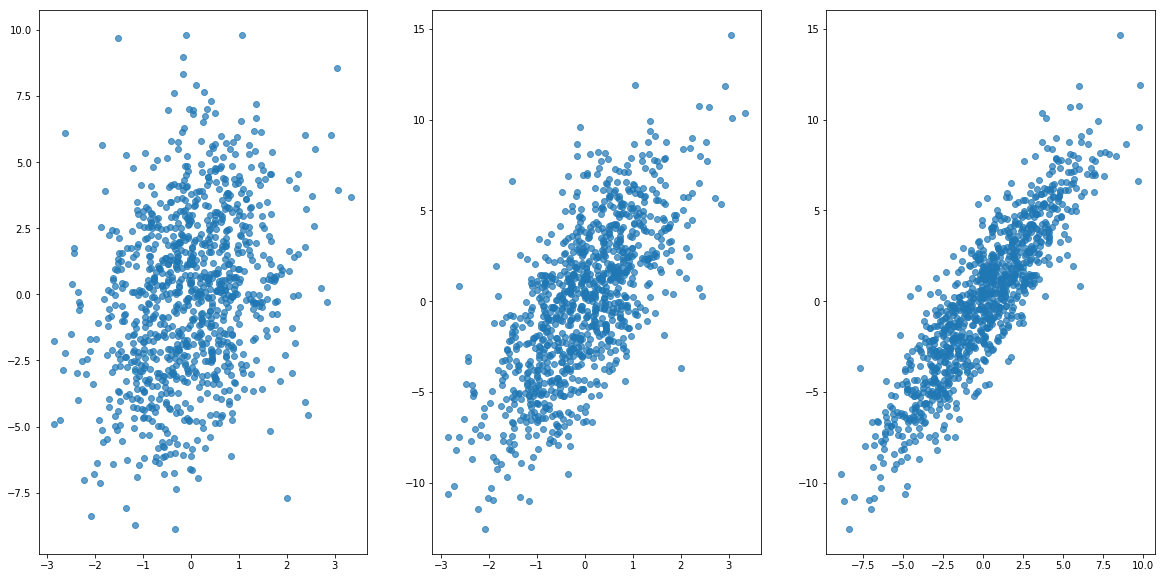

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(data.iloc[:,0],data.iloc[:,1],alpha=0.7,label='set')
ax2.scatter(data.iloc[:,0],data.iloc[:,2],alpha=0.7,label='set')
ax3.scatter(data.iloc[:,1],data.iloc[:,2],alpha=0.7,label='set')

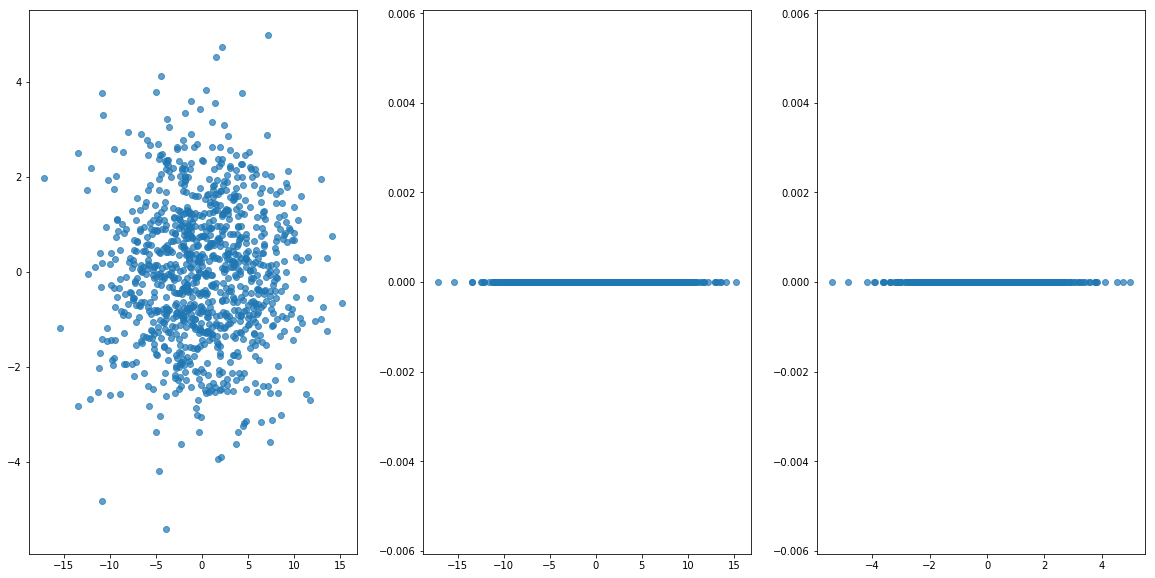

In [43]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax4.scatter(datarot.iloc[:,0],datarot.iloc[:,1],alpha=0.7,label='set')
ax5.scatter(datarot.iloc[:,0],datarot.iloc[:,2],alpha=0.7,label='set')
ax6.scatter(datarot.iloc[:,1],datarot.iloc[:,2],alpha=0.7,label='set')

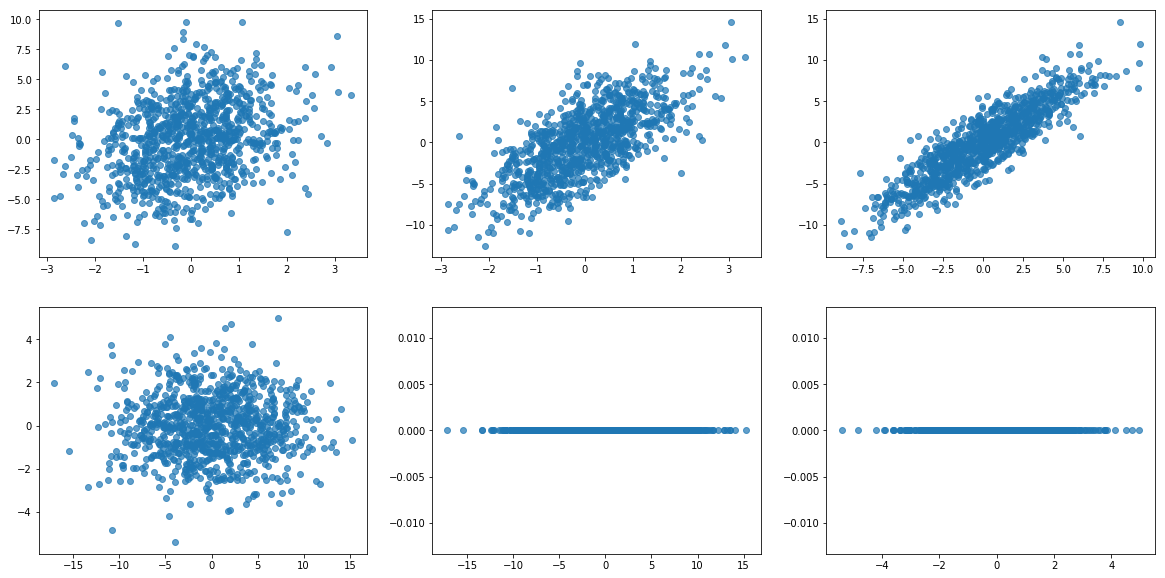

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes[0,0].scatter(data.iloc[:,0],data.iloc[:,1],alpha=0.7,label='set')
axes[0,1].scatter(data.iloc[:,0],data.iloc[:,2],alpha=0.7,label='set')
axes[0,2].scatter(data.iloc[:,1],data.iloc[:,2],alpha=0.7,label='set')
axes[1,0].scatter(datarot.iloc[:,0],datarot.iloc[:,1],alpha=0.7,label='set')
axes[1,1].scatter(datarot.iloc[:,0],datarot.iloc[:,2],alpha=0.7,label='set')
axes[1,2].scatter(datarot.iloc[:,1],datarot.iloc[:,2],alpha=0.7,label='set')

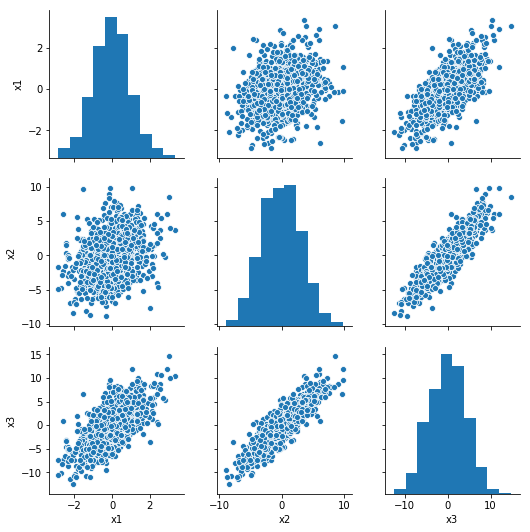

In [19]:
sns.pairplot(data);

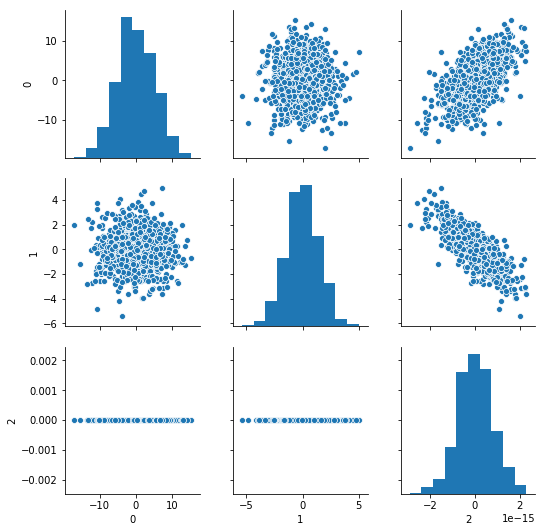

In [42]:
sns.pairplot(datarot);

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [50]:
x1=np.random.normal(0, 1, 1000)
for i in range(10):
    s1=np.random.uniform(0.01,0.03)
    x1=x1+np.random.normal(0, s1, 1000)
x2=x1+np.random.normal(0, 3, 1000)
for j in range(10):
    s2=np.random.uniform(0.03,0.09)
    x2=x2+np.random.normal(0, s1, 1000)
x3=2*x1+x2
data = pd.DataFrame(
    { 'x1' : x1,
      'x2' : x2,
      'x3' : x3,
    }
    )
data

x1        x2         x3
0    0.128028  6.867062   7.123119
1    0.963996 -2.856875  -0.928882
2   -0.901434  0.769627  -1.033241
3    1.345831  2.662889   5.354551
4    0.247963 -0.568002  -0.072076
5   -0.172660 -2.259535  -2.604856
6   -1.776207  3.088750  -0.463665
7   -0.618184  0.116381  -1.119987
8   -0.716312 -3.823574  -5.256197
9   -0.483628 -2.933562  -3.900817
10  -0.988463 -2.741694  -4.718621
11  -1.302446 -4.289955  -6.894847
12  -0.835337 -2.306347  -3.977022
13  -0.904989 -1.642105  -3.452084
14   1.330908  0.145968   2.807785
15   2.555263 -4.001703   1.108823
16  -0.446326  3.753388   2.860736
17   1.068419  3.798887   5.935724
18   1.113204  2.488592   4.715000
19  -0.973783 -1.721846  -3.669412
20  -0.028591  1.623610   1.566428
21   2.918860  0.769919   6.607639
22   1.310152  0.981458   3.601761
23   2.269966  1.820028   6.359960
24   0.991315  2.532550   4.515180
25  -1.192663  3.415007   1.029680
26   0.299580  6.610052   7.209212
27   0.896926  7.587411   9.381263
28   0.243016 -1.633990  -1.147958
29  -0.387296 -3.831819  -4.606412
..        ...       ...        ...
970  0.284894 -2.917653  -2.347865
971 -1.778207  2.216422  -1.339991
972  0.509003 -4.364994  -3.346988
973 -0.294552  0.730394   0.141290
974  1.261063  8.785374  11.307499
975  0.465733  1.957378   2.888844
976  0.302645 -0.912458  -0.307168
977  0.282261  4.039707   4.604229
978  0.454100 -2.805980  -1.897781
979 -0.362286  0.565427  -0.159145
980  0.008594 -2.354324  -2.337135
981  1.152129 -4.144634  -1.840376
982 -1.217885 -1.950717  -4.386488
983 -1.195864  1.261440  -1.130289
984  0.654234 -1.277700   0.030768
985  1.198819  2.824908   5.222546
986  0.808459  2.328503   3.945420
987  0.441755 -3.913897  -3.030387
988 -0.022818 -0.126422  -0.172058
989  1.416349  1.508977   4.341675
990  0.823448  3.000480   4.647376
991 -0.027539 -0.598502  -0.653579
992  1.021685  5.679652   7.723023
993  0.004967  2.353702   2.363636
994  0.253940 -0.114967   0.392913
995 -1.407445 -6.992608  -9.807497
996 -0.259118  1.661921   1.143685
997  1.464654  4.940859   7.870167
998 -2.181918 -5.123103  -9.486939
999 -0.126732 -3.114118  -3.367582

[1000 rows x 3 columns]

In [51]:
c=np.cov(data, rowvar=False)
print("Covariance matrix:")
print(c)
l, V = la.eig(c)
print("\nCovariance matrix again with eigenvalues-eigenvectors decomposition:")
print(np.dot(V,np.dot(np.diag(l), la.inv(V))))
print("\nEigenvectors:","\nFirst->",V[0],"\nSecond->",V[1],"\nThird->",V[2])
print("\nEigenvalues:",l)
U, spectrum, Vt = la.svd(c)
print("\nCovariance matrix again with singular value decomposition:")
print(np.dot(U,np.dot(np.diag(spectrum), Vt)))
print("\nEigenvalues with SVD:",spectrum) #they are in non decreasing order
                                          #the last one is different since the machine precision is 1e-16

print("\nWeight of first eigenvalue:",spectrum[0]/spectrum.sum())
print("\nWeight of second eigenvalue:",spectrum[1]/spectrum.sum())
print("\nWeight of first+second eigenvalue:",(spectrum[0]+spectrum[1])/spectrum.sum())


#general case
threshold=0.99
i=1
while ((spectrum[:i].sum())/(spectrum.sum()))<threshold:
    i+=1
#Reducing the dimensionality to k<p simply means setting to zero all but first k diagonal values
spectrum[i:len(spectrum)]=0
print("\nTo keep the "+str(threshold*100)+"% we need",i,"eigenvalues")



print("\nRotate the data to obtain a trivial column:")
datarot=np.dot(data,U) #the last column becomes all 1e-16 which means zero
datarot=pd.DataFrame(datarot)
datarot


Covariance matrix:
[[ 0.91742689  0.92811429  2.76296806]
 [ 0.92811429  9.76951568 11.62574425]
 [ 2.76296806 11.62574425 17.15168037]]

Covariance matrix again with eigenvalues-eigenvectors decomposition:
[[ 0.91742689+0.j  0.92811429+0.j  2.76296806+0.j]
 [ 0.92811429+0.j  9.76951568+0.j 11.62574425+0.j]
 [ 2.76296806+0.j 11.62574425+0.j 17.15168037+0.j]]

Eigenvectors: 
First-> [-0.11035686 -0.81649658  0.56670512] 
Second-> [-0.58371233 -0.40824829 -0.70186412] 
Third-> [-0.80442606  0.40824829  0.43154612]

Eigenvalues: [2.59666643e+01+0.j 1.12224561e-15+0.j 1.87195863e+00+0.j]

Covariance matrix again with singular value decomposition:
[[ 0.91742689  0.92811429  2.76296806]
 [ 0.92811429  9.76951568 11.62574425]
 [ 2.76296806 11.62574425 17.15168037]]

Eigenvalues with SVD: [2.59666643e+01 1.87195863e+00 4.66715614e-16]

Weight of first eigenvalue: 0.9327567805332931

Weight of second eigenvalue: 0.06724321946670686

Weight of first+second eigenvalue: 1.0

To keep the 99.0% we n

0         1             2
0    -9.752540 -1.673236  1.096446e-15
1     2.308427  2.150584 -6.418564e-16
2     0.481405 -1.496913  2.457910e-16
3    -6.010223  1.204438 -3.120236e-16
4     0.362165  0.508078 -1.630568e-16
5     3.433387  0.363924 -2.934342e-16
6    -1.233941 -3.374561  7.058127e-16
7     0.901235 -0.915338  6.178106e-17
8     6.539139  0.009400 -5.240928e-16
9     4.903647  0.101505 -3.499721e-16
10    5.505226 -0.672173 -4.627914e-16
11    8.194228 -0.702582 -5.281772e-16
12    4.637649 -0.570916 -1.954060e-16
13    3.835335 -0.850061 -2.501907e-16
14   -2.490734  1.863471 -3.447614e-16
15    1.161886  4.735241 -1.099531e-15
16   -4.442894 -1.652765  8.044581e-16
17   -7.110216  0.500715  2.419309e-16
18   -5.368340  0.918944 -2.026300e-17
19    4.064297 -0.926866 -1.083104e-16
20   -2.204641 -0.479771  3.531041e-16
21   -6.086884  3.965255 -3.354085e-16
22   -3.614824  1.607945 -1.517695e-16
23   -6.428997  2.753605 -3.998474e-16
24   -5.219807  0.732785  2.857714e-16
25   -2.690065 -2.628405  9.287990e-16
26   -9.690708 -1.358478  1.378533e-15
27  -12.074380 -0.768592  1.023908e-15
28    1.850409  0.789161 -3.451396e-16
29    5.984938  0.482054 -6.095106e-16
..         ...       ...           ...
970   3.560314  1.196035 -6.577871e-16
971  -0.019592 -3.141614  7.292610e-16
972   5.184134  1.907707 -8.465379e-16
973  -0.507491 -0.618588  1.934809e-16
974 -14.363345 -0.571781  1.172371e-15
975  -3.517804  0.136790  2.751553e-16
976   0.746309  0.679375 -2.286862e-16
977  -6.092938 -0.688429  6.438625e-16
978   3.114396  1.407777 -6.277634e-16
979  -0.162045 -0.670841  1.910558e-16
980   3.253352  0.648704 -5.039099e-16
981   3.772575  2.767681 -9.198511e-16
982   4.801665 -1.214015 -5.798692e-17
983   0.304888 -2.050834  4.460362e-16
984   0.648860  1.280808 -3.170451e-16
985  -5.982383  0.950445  1.866396e-16
986  -4.622193  0.526496  1.728360e-16
987   4.673561  1.689618 -9.391218e-16
988   0.214720  0.001549 -1.656221e-17
989  -4.529669  1.617188 -1.238334e-17
990  -5.580761  0.366280  3.034177e-16
991   0.878148  0.122411 -6.285020e-17
992  -9.640634 -0.074510  4.717275e-16
993  -3.275803 -0.629146  3.416686e-16
994  -0.276986  0.394160 -5.844674e-17
995  12.126399 -0.122133 -1.152191e-15
996  -1.861499 -0.819734  3.062975e-16
997  -9.376642  0.758556  5.564360e-16
998  10.862749 -1.734833 -4.187245e-16
999   4.540706  0.660601 -6.524595e-16

[1000 rows x 3 columns]

In [52]:
datarot2=datarot.iloc[:,0:2] #I don't want the last column since is always zero
datarot2

0         1
0    -9.752540 -1.673236
1     2.308427  2.150584
2     0.481405 -1.496913
3    -6.010223  1.204438
4     0.362165  0.508078
5     3.433387  0.363924
6    -1.233941 -3.374561
7     0.901235 -0.915338
8     6.539139  0.009400
9     4.903647  0.101505
10    5.505226 -0.672173
11    8.194228 -0.702582
12    4.637649 -0.570916
13    3.835335 -0.850061
14   -2.490734  1.863471
15    1.161886  4.735241
16   -4.442894 -1.652765
17   -7.110216  0.500715
18   -5.368340  0.918944
19    4.064297 -0.926866
20   -2.204641 -0.479771
21   -6.086884  3.965255
22   -3.614824  1.607945
23   -6.428997  2.753605
24   -5.219807  0.732785
25   -2.690065 -2.628405
26   -9.690708 -1.358478
27  -12.074380 -0.768592
28    1.850409  0.789161
29    5.984938  0.482054
..         ...       ...
970   3.560314  1.196035
971  -0.019592 -3.141614
972   5.184134  1.907707
973  -0.507491 -0.618588
974 -14.363345 -0.571781
975  -3.517804  0.136790
976   0.746309  0.679375
977  -6.092938 -0.688429
978   3.114396  1.407777
979  -0.162045 -0.670841
980   3.253352  0.648704
981   3.772575  2.767681
982   4.801665 -1.214015
983   0.304888 -2.050834
984   0.648860  1.280808
985  -5.982383  0.950445
986  -4.622193  0.526496
987   4.673561  1.689618
988   0.214720  0.001549
989  -4.529669  1.617188
990  -5.580761  0.366280
991   0.878148  0.122411
992  -9.640634 -0.074510
993  -3.275803 -0.629146
994  -0.276986  0.394160
995  12.126399 -0.122133
996  -1.861499 -0.819734
997  -9.376642  0.758556
998  10.862749 -1.734833
999   4.540706  0.660601

[1000 rows x 2 columns]

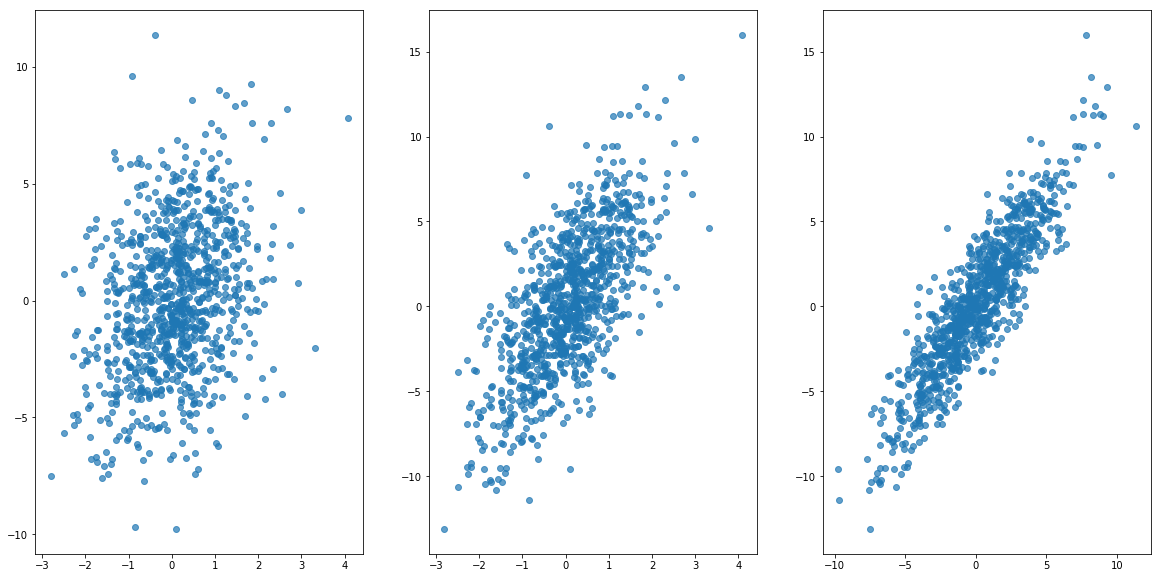

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax1.scatter(data.iloc[:,0],data.iloc[:,1],alpha=0.7,label='set')
ax2.scatter(data.iloc[:,0],data.iloc[:,2],alpha=0.7,label='set')
ax3.scatter(data.iloc[:,1],data.iloc[:,2],alpha=0.7,label='set')

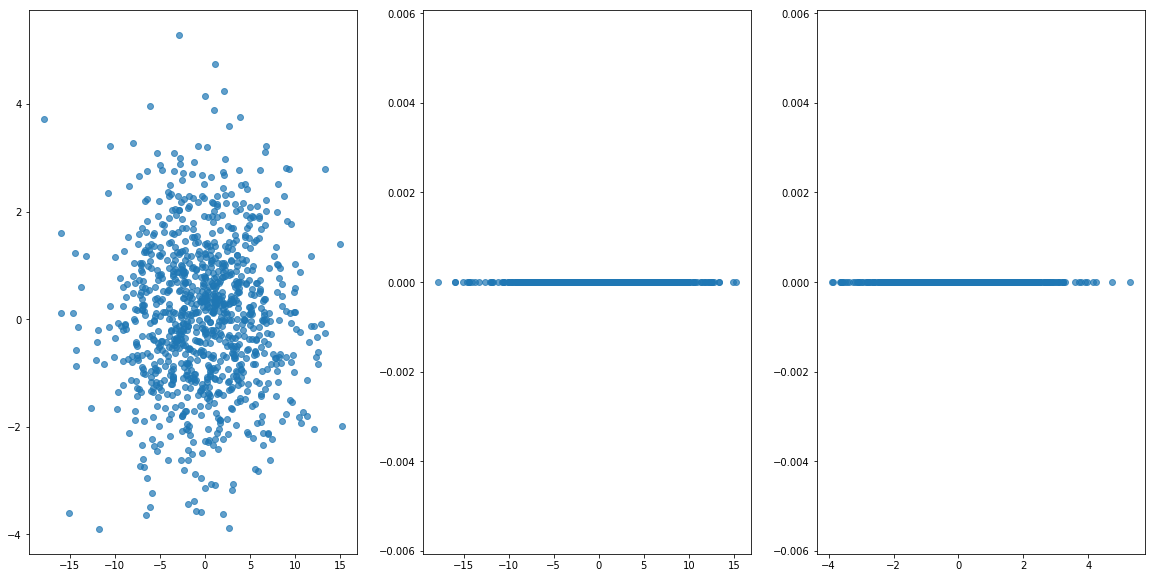

In [54]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
ax4.scatter(datarot.iloc[:,0],datarot.iloc[:,1],alpha=0.7,label='set')
ax5.scatter(datarot.iloc[:,0],datarot.iloc[:,2],alpha=0.7,label='set')
ax6.scatter(datarot.iloc[:,1],datarot.iloc[:,2],alpha=0.7,label='set')

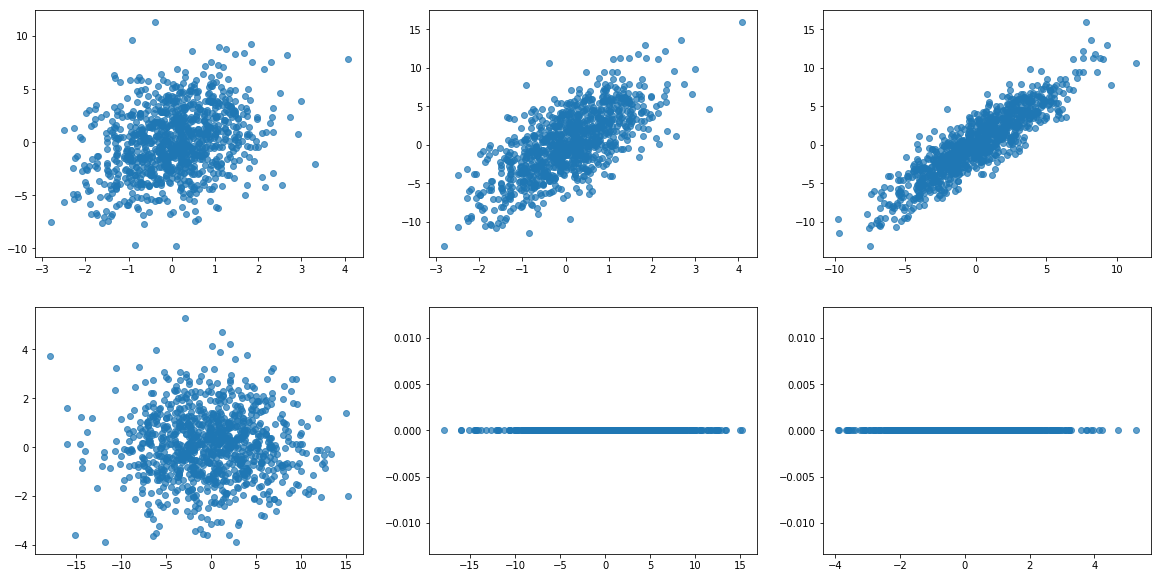

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes[0,0].scatter(data.iloc[:,0],data.iloc[:,1],alpha=0.7,label='set')
axes[0,1].scatter(data.iloc[:,0],data.iloc[:,2],alpha=0.7,label='set')
axes[0,2].scatter(data.iloc[:,1],data.iloc[:,2],alpha=0.7,label='set')
axes[1,0].scatter(datarot.iloc[:,0],datarot.iloc[:,1],alpha=0.7,label='set')
axes[1,1].scatter(datarot.iloc[:,0],datarot.iloc[:,2],alpha=0.7,label='set')
axes[1,2].scatter(datarot.iloc[:,1],datarot.iloc[:,2],alpha=0.7,label='set')

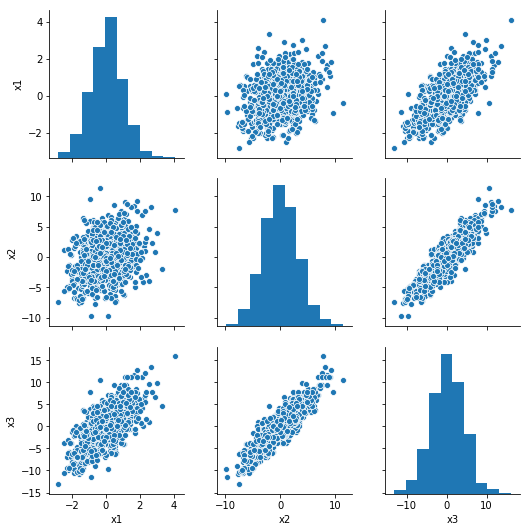

In [56]:
sns.pairplot(data);

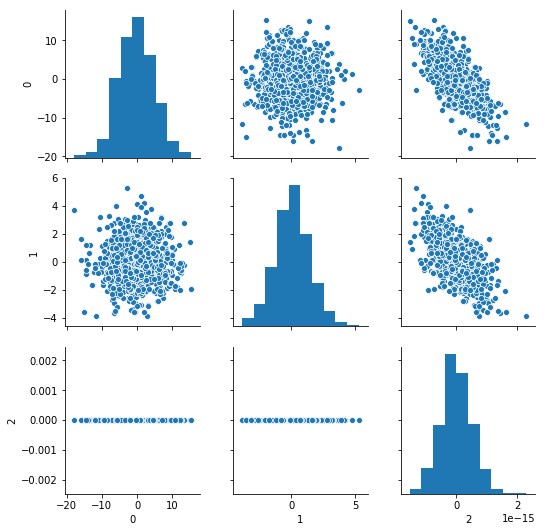

In [57]:
sns.pairplot(datarot);

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset